In [108]:
import pandas as pd
import seaborn as sns
from summarytools import dfSummary
from sklearn.preprocessing import power_transform
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [109]:
data = pd.read_csv('BankChurners.csv')

In [110]:
len(data)

10127

In [111]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [112]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

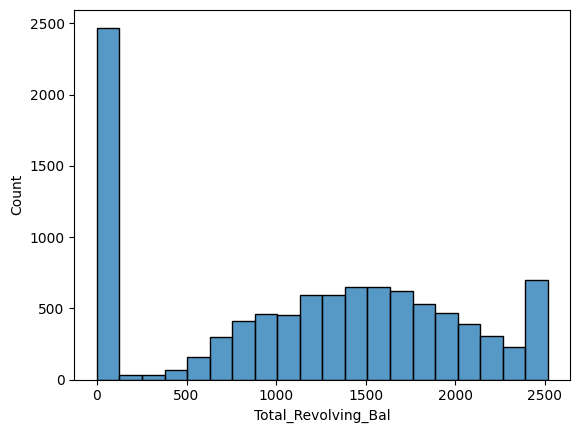

In [113]:
sns.histplot(data=data, x='Total_Revolving_Bal')
#El saldo que se traslada de un mes al siguiente.

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Count'>

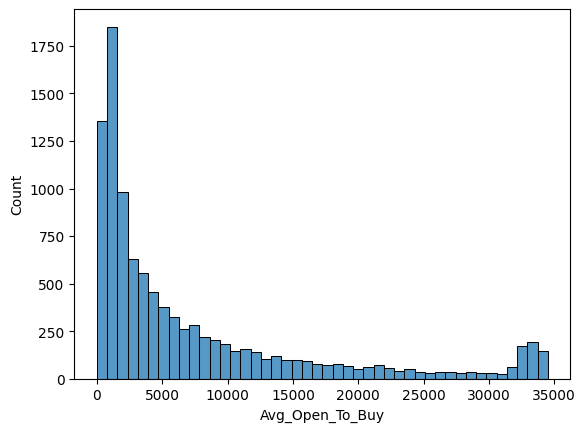

In [114]:
sns.histplot(data = data, x='Avg_Open_To_Buy')
#Línea de Crédito Abierta para Comprar (Promedio de los últimos 12 meses)

<Axes: xlabel='Customer_Age', ylabel='Count'>

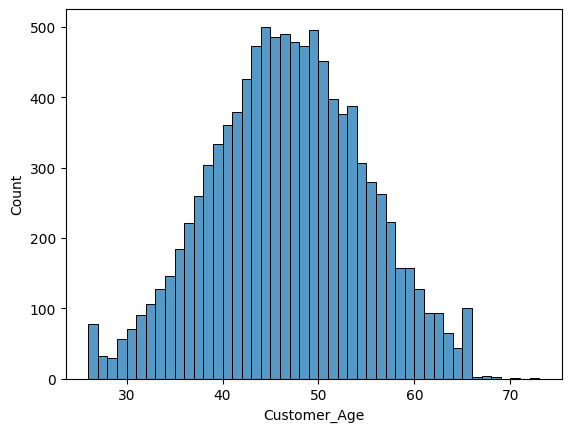

In [115]:
sns.histplot(data=data, x='Customer_Age')
#Edad de los clientes

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

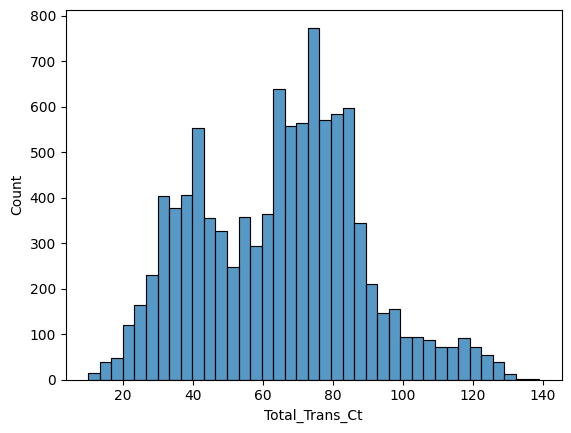

In [116]:
sns.histplot(data=data, x='Total_Trans_Ct')
#Total Transaction Count (Last 12 months)

In [117]:
data_clean = data[['Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Customer_Age','Total_Trans_Ct']]
#Creamos un nuevo dataset únicamente con las variables que utilizaremos
data_clean

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
0,777,11914.0,45,42
1,864,7392.0,49,33
2,0,3418.0,51,20
3,2517,796.0,40,20
4,0,4716.0,40,28
...,...,...,...,...
10122,1851,2152.0,50,117
10123,2186,2091.0,41,69
10124,0,5409.0,44,60
10125,0,5281.0,30,62


In [118]:
data_clean.describe()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,1162.814061,7469.139637,46.325960,64.858695
std,814.987335,9090.685324,8.016814,23.472570
min,0.000000,3.000000,26.000000,10.000000
25%,359.000000,1324.500000,41.000000,45.000000
50%,1276.000000,3474.000000,46.000000,67.000000
75%,1784.000000,9859.000000,52.000000,81.000000
max,2517.000000,34516.000000,73.000000,139.000000


In [119]:
data_clean

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
0,777,11914.0,45,42
1,864,7392.0,49,33
2,0,3418.0,51,20
3,2517,796.0,40,20
4,0,4716.0,40,28
...,...,...,...,...
10122,1851,2152.0,50,117
10123,2186,2091.0,41,69
10124,0,5409.0,44,60
10125,0,5281.0,30,62


Método IQR

In [120]:
temp = pd.DataFrame()

for col in data_clean.columns:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    #temp[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =359.0 Q3=1784.0 IQR =1425.0 umbral_inferior = -1778.5 umbral_superior =3921.5
Q1 =1324.5 Q3=9859.0 IQR =8534.5 umbral_inferior = -11477.25 umbral_superior =22660.75
Q1 =41.0 Q3=52.0 IQR =11.0 umbral_inferior = 24.5 umbral_superior =68.5
Q1 =45.0 Q3=81.0 IQR =36.0 umbral_inferior = -9.0 umbral_superior =135.0


C:\Users\JEYxc\AppData\Local\Temp\ipykernel_81720\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JEYxc\AppData\Local\Temp\ipykernel_81720\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JEYxc\AppData\Local\Temp\ipykernel_81720\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [121]:
data_clean

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal_outliers,Avg_Open_To_Buy_outliers,Customer_Age_outliers,Total_Trans_Ct_outliers
0,777,11914.0,45,42,False,False,False,False
1,864,7392.0,49,33,False,False,False,False
2,0,3418.0,51,20,False,False,False,False
3,2517,796.0,40,20,False,False,False,False
4,0,4716.0,40,28,False,False,False,False
...,...,...,...,...,...,...,...,...
10122,1851,2152.0,50,117,False,False,False,False
10123,2186,2091.0,41,69,False,False,False,False
10124,0,5409.0,44,60,False,False,False,False
10125,0,5281.0,30,62,False,False,False,False


In [122]:
data_clean.groupby(by='Total_Revolving_Bal_outliers').count()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct,Avg_Open_To_Buy_outliers,Customer_Age_outliers,Total_Trans_Ct_outliers
Total_Revolving_Bal_outliers,,,,,,,
False,10127,10127,10127,10127,10127,10127,10127


In [123]:
data_clean.groupby(by='Avg_Open_To_Buy').count()

,Total_Revolving_Bal,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal_outliers,Avg_Open_To_Buy_outliers,Customer_Age_outliers,Total_Trans_Ct_outliers
Avg_Open_To_Buy,,,,,,,
3.0,1,1,1,1,1,1,1
10.0,1,1,1,1,1,1,1
14.0,2,2,2,2,2,2,2
15.0,1,1,1,1,1,1,1
24.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
34297.0,1,1,1,1,1,1,1
34300.0,1,1,1,1,1,1,1
34302.0,1,1,1,1,1,1,1


In [124]:
data_clean.groupby(by='Customer_Age_outliers').count()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal_outliers,Avg_Open_To_Buy_outliers,Total_Trans_Ct_outliers
Customer_Age_outliers,,,,,,,
False,10125,10125,10125,10125,10125,10125,10125
True,2,2,2,2,2,2,2


In [125]:
data_clean.groupby(by='Total_Trans_Ct_outliers').count()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal_outliers,Avg_Open_To_Buy_outliers,Customer_Age_outliers
Total_Trans_Ct_outliers,,,,,,,
False,10125,10125,10125,10125,10125,10125,10125
True,2,2,2,2,2,2,2


In [126]:
data_no_outliers =  data_clean[data_clean['Total_Revolving_Bal_outliers'] == False] #En este proceso tenemos un filtro de la columna Total_Trans_Amt_outliers, donde solo los valores que no son outliers (valores false) serán incluidos
data_no_outliers = data_no_outliers[data_no_outliers['Avg_Open_To_Buy_outliers'] == False]
data_no_outliers = data_no_outliers[data_no_outliers['Customer_Age_outliers'] == False]
data_no_outliers = data_no_outliers[data_no_outliers['Total_Trans_Ct_outliers'] == False]
data_no_outliers.reset_index(drop=True)

#Creamos un dataframe sin outliers

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal_outliers,Avg_Open_To_Buy_outliers,Customer_Age_outliers,Total_Trans_Ct_outliers
0,777,11914.0,45,42,False,False,False,False
1,864,7392.0,49,33,False,False,False,False
2,0,3418.0,51,20,False,False,False,False
3,2517,796.0,40,20,False,False,False,False
4,0,4716.0,40,28,False,False,False,False
...,...,...,...,...,...,...,...,...
9156,1851,2152.0,50,117,False,False,False,False
9157,2186,2091.0,41,69,False,False,False,False
9158,0,5409.0,44,60,False,False,False,False
9159,0,5281.0,30,62,False,False,False,False


In [127]:
data_no_outliers.describe()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
count,9161.000000,9161.000000,9161.000000,9161.000000
mean,1162.574391,5045.067143,46.319070,64.388604
std,815.590016,5305.713355,8.136676,23.019473
min,0.000000,3.000000,26.000000,10.000000
25%,357.000000,1155.000000,41.000000,45.000000
50%,1276.000000,2849.000000,46.000000,67.000000
75%,1783.000000,7289.000000,52.000000,80.000000
max,2517.000000,22616.000000,68.000000,131.000000


<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

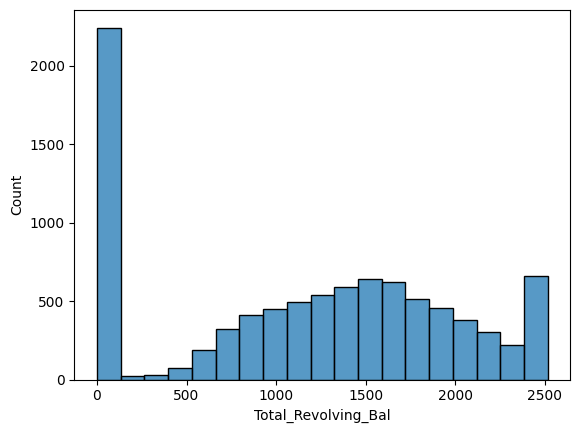

In [128]:
sns.histplot(data=data_no_outliers, x='Total_Revolving_Bal')

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Count'>

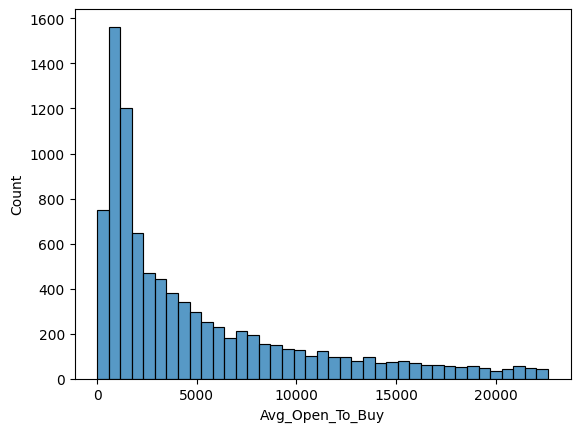

In [129]:
sns.histplot(data=data_no_outliers, x='Avg_Open_To_Buy')

<Axes: xlabel='Customer_Age', ylabel='Count'>

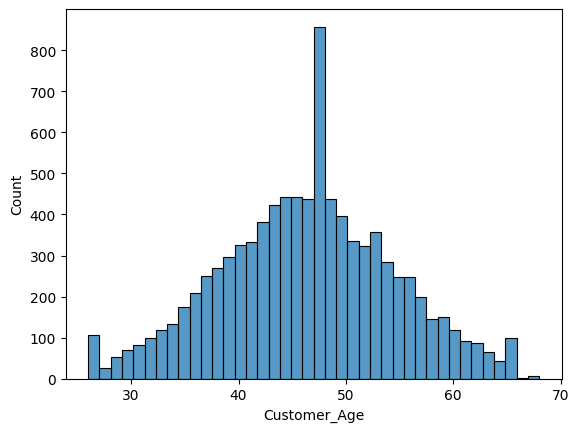

In [130]:
sns.histplot(data=data_no_outliers, x='Customer_Age')

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

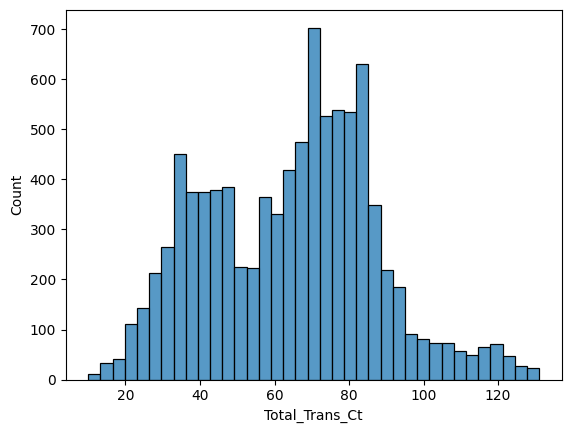

In [131]:
sns.histplot(data=data_no_outliers, x='Total_Trans_Ct')

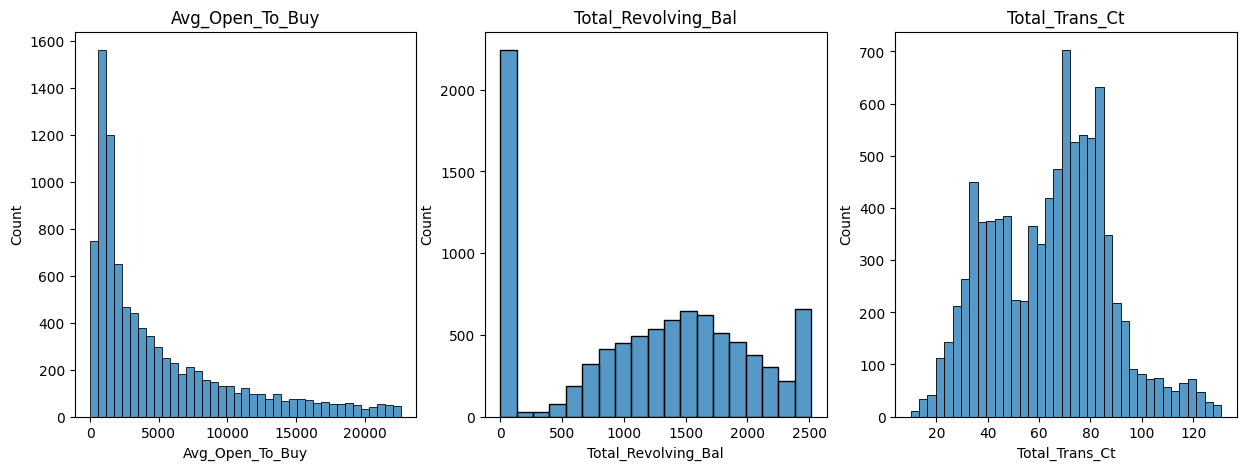

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(data_no_outliers, x='Avg_Open_To_Buy', ax=axes[0])
sns.histplot(data_no_outliers, x='Total_Revolving_Bal', ax=axes[1])
sns.histplot(data_no_outliers, x='Total_Trans_Ct', ax=axes[2])


axes[0].set_title('Avg_Open_To_Buy')
axes[1].set_title('Total_Revolving_Bal')
axes[2].set_title('Total_Trans_Ct')

# Display the plots
plt.show()

In [133]:
dfSummary(data_no_outliers)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Total_Revolving_Bal[int64],Mean (sd) : 1162.6 (815.6)min < med < max:0.0 < 1276.0 < 2517.0IQR (CV) : 1426.0 (1.4),"1,929 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dP47aQBSA8TdhQQYkW/wRdFxgpS2QaDhAyhw2R0hBkZob0CEhZISzFsZ4q0SKwi54xrP4Od+v3jEUn2EftsamKAoB6u7Lo98AcI+nW39gjOmKSMfy+KeiKF4t1wJ/fBiqMaY7Go2+hWE4sDn44XDYG2O+Eytc3fpE7YRhOFgul69RFKVlDhzHcbBarQa73a4jIoQKJze/+kVEoihKJ5PJL4vjdy3WAP9gmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSocNdufvg8jhsnizR082RC9cAhtmA4HH6Noqhv+9pN3TyZUCvmskt3lmWBiDwvFouf4/H4UHZ9kzdPJtTqWe/SvdlsBuv1uhcEQWa5cbJIQzdPJlRPbHbp3u/3jYysCkz9UIFP1Hc4DETh5XJpV/1+/neEeoXrQJTn+XOapj9ExPb/TGt5nrdFJDTG2Cyv7U9bhHqd80B0Pp9bvt7ce5IkaWdZ9jKbzVqtVqvU+xap909bhPoBbQPR6XR6CoKgN5/P0+l0ui+ztoqftnw+5ZFQG6jf73/6c8F8P+WxsaE6nt0MROV5fcpjI0N1PbsfPRBp5uspj40MVRzObpHHDkS4rqmhioj92c0VovrhyhRUaPQnKspxvFjgdQAlVIiI+8UC3wMooUJE3C4WiPgfQAkVf7G9WOB7AGWYggqEChVq/dXPPaH4rbahar4nFNWrbaii9J5Q+FHnUEVE3z2h8INhCioQKlQgVKhAqFCBUKGC16m/zreNQRdvodb9tjHo4i3Uut82Bl3uCjWO46DsgY/HY+k11yRJEmy3257Na9usdV3/qLWaX/uevt4AvbiNGUZ6VkEAAAAASUVORK5CYII="">",0(0.0%)
2,Avg_Open_To_Buy[float64],Mean (sd) : 5045.1 (5305.7)min < med < max:3.0 < 2849.0 < 22616.0IQR (CV) : 6134.0 (1.0),"6,031 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjElEQVR4nO3dP2/aQBiA8fcgIBOoLUQCm5fuHTyy9Bv0w3btiARfgKFLJxaEZIERThDIdZdSVUrEn7s48Xt6fnPOZng44jtLZ8qyFKDuGh/9AYBr3F36A2NMR0Taltc/lGX5bDkW+OdsqMaYzmAw+BaGYd/m4tvtdm2M+U6scHVpRm2HYdgfj8fPURTtb7lwlmXBdDrtp2naFhFChZOLP/0iIlEU7YfD4ZPF9TsWY4AXeJiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS46rAJW0VRtEQkNMbYXoJzqiAiFYaa53nreDx+ieO42Ww2bzr654RzqnBSWaiHw+EuCIL7JEn2o9Fofet4zqnC/yr96RcR6Xa7tmdUiXBOFf7iYQoqECpUIFSoQKhQgVChAqFCBUKFCpWvo7pw3IJl+9UjtQ3VdQuW7Ve/1DZUly1Ytl/9U9tQTxy2YNl+9UjtQ7XFK4Z+8TJUXjH0j5eh8oqhf7wM9YRXDP3hdaguWMOtF0J9BWu49UOor3Bdw51MJsM0TR+MMVub2xP4S4R6hs3/uK6z8Waz2RljfoiI1WqFeBo6ob4xl9l4uVx+ms1mX+M4frBdVnMMvbaRE2pFbGbj9XrdcVlWcw39DWbzhoj8thx79ktCqDVku6zmErpr5EVRtPI8/9zr9X41Go3jreMvPYASqoc+YjZfLBb9+Xz+mCTJzypeIroq1CzLgltuLCKy2+0CEZE8z4PVanX/nuO13rsOn7uu/gCYaYZfM6j09wAAAABJRU5ErkJggg=="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.1)min < med < max:26.0 < 46.0 < 68.0IQR (CV) : 11.0 (5.7),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkklEQVR4nO3cQW7aQBSA4Td1QAYkWwgJdlygUhYsOUQP2yN0wQm4ATskhIxwY2GMs6gqEYkmYHua9yb/tzfx4hfBnpnn6roWQLtvn30DwD2ePvsGQuScG4hIv+Hlp7quX7q8nxAQasecc4PJZPIjSZJxk+sPh8PeOfeTWN8i1O71kyQZL5fLlzRNi0cuzLIsXq1W491u1xcRQr1CqJ6kaVpMp9PfDS4ddH4zAeBhCiYQKkwgVJhAqDCBUGECocIEXk/9Q4vVpeRyufS6vp+vjlBvaLO6VJZlXFXV96IofolIk/eouIFQb2u8urTZbMbr9Xp4Pp8jXzf3FRHqO5qsLu33e1aWPOBhCiYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmBLsy1fLIMhtLlAky1LZHltlYok+QoUqLTSUibCzRKNRQRaT5kWU2lugTdKgWVVXVE5HEOdf0I4IcCUSoiuR53ivL8nk+n0dRFD38k0Uk3JFAhKrI6XR6iuN4uFgsitlstn/0+pBHAhGqQqPRqOk4IJFARwLxwh8mECpMIFSYQKgwgVBhAqHCBNWvpxirg7/UhspYHVxTG6owVgdXNIcqIozVwR88TMEEQoUJ6v/14zEt97Oq3ctKqAFpu59V815WQg1Im/2s2veyEmqAWuxnVfu2hIcpmECoMIFQYQKhwgRChQmEChO8vp5ioh664i1UJuqhSz6/UZmoZ4zmuVfeV6aYqGeD9rlXLKFCRPTPvSJUvKF17tWHoXISFBq8GyonQaHFR9+onASFCnf9RuUkKO7h8xgMD1PohO9jMISKTvg+BkOo6JSvYzDsnoIJd32jZlkWP/rBx+MxFhHJ8zzebrfD/3m91b9t9b7bXn9PX69kErL1VkXW2wAAAABJRU5ErkJggg=="">",0(0.0%)
4,Total_Trans_Ct[int64],Mean (sd) : 64.4 (23.0)min < med < max:10.0 < 67.0 < 131.0IQR (CV) : 35.0 (2.8),122 distinct values,"

In [134]:
data_no_outliers = data_no_outliers[['Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Customer_Age','Total_Trans_Ct']]
data_no_outliers #eliminamos las columnas de los outliers  

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
0,777,11914.0,45,42
1,864,7392.0,49,33
2,0,3418.0,51,20
3,2517,796.0,40,20
4,0,4716.0,40,28
...,...,...,...,...
10122,1851,2152.0,50,117
10123,2186,2091.0,41,69
10124,0,5409.0,44,60
10125,0,5281.0,30,62


In [135]:
data_no_outliers.describe()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
count,9161.000000,9161.000000,9161.000000,9161.000000
mean,1162.574391,5045.067143,46.319070,64.388604
std,815.590016,5305.713355,8.136676,23.019473
min,0.000000,3.000000,26.000000,10.000000
25%,357.000000,1155.000000,41.000000,45.000000
50%,1276.000000,2849.000000,46.000000,67.000000
75%,1783.000000,7289.000000,52.000000,80.000000
max,2517.000000,22616.000000,68.000000,131.000000


In [136]:
from sklearn.preprocessing import PowerTransformer

#Yeo-Johnson transformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

data_bc = yeo_johnson_transformer.fit_transform(data_no_outliers)

#Nuevo DataFrame
data_bc = pd.DataFrame(data_bc, columns=data_no_outliers.columns)

print(data_bc)


      Total_Revolving_Bal  Avg_Open_To_Buy  Customer_Age  Total_Trans_Ct
0               -0.001749         1.279004     -0.163941       -0.963284
1                0.078043         0.823998      0.327992       -1.398270
2               -1.663900         0.125448      0.574270       -2.076668
3                1.112643        -1.078864     -0.777599       -2.076668
4               -1.663900         0.411592     -0.777599       -1.650859
...                   ...              ...           ...             ...
9156             0.766887        -0.272743      0.451106        2.144705
9157             0.948540        -0.296993     -0.654986        0.237498
9158            -1.663900         0.535786     -0.286788       -0.148897
9159            -1.663900         0.513991     -2.000040       -0.061995
9160             0.828510         0.947143     -0.409579       -0.105369

[9161 rows x 4 columns]


<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

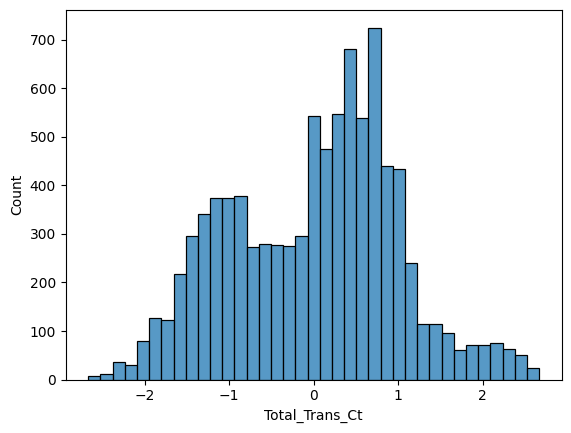

In [137]:
sns.histplot(data_bc,x= 'Total_Trans_Ct')

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

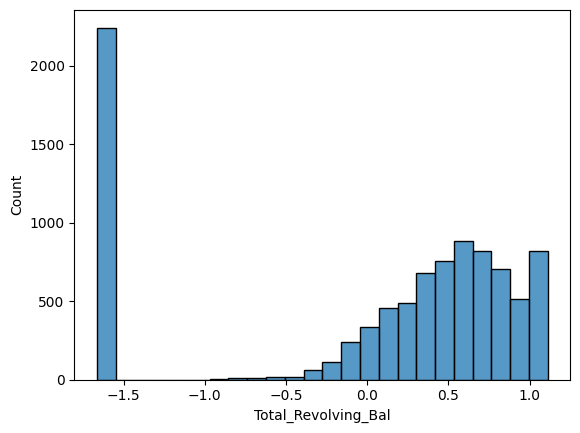

In [138]:
sns.histplot(data_bc,x= 'Total_Revolving_Bal')

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Count'>

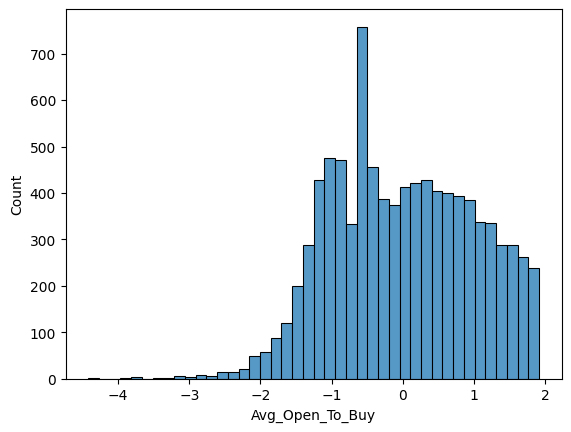

In [139]:
sns.histplot(data_bc,x= 'Avg_Open_To_Buy')

<Axes: xlabel='Customer_Age', ylabel='Count'>

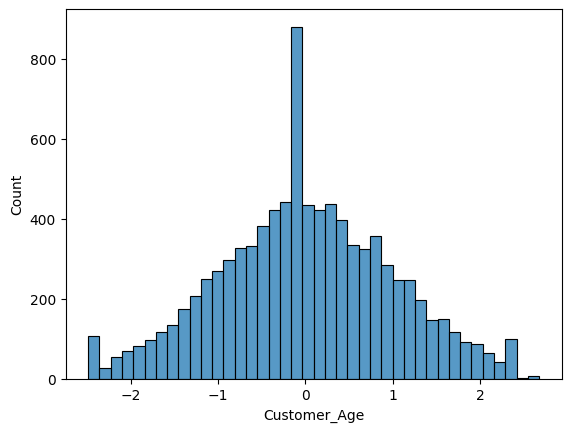

In [140]:
sns.histplot(data_bc,x= 'Customer_Age')

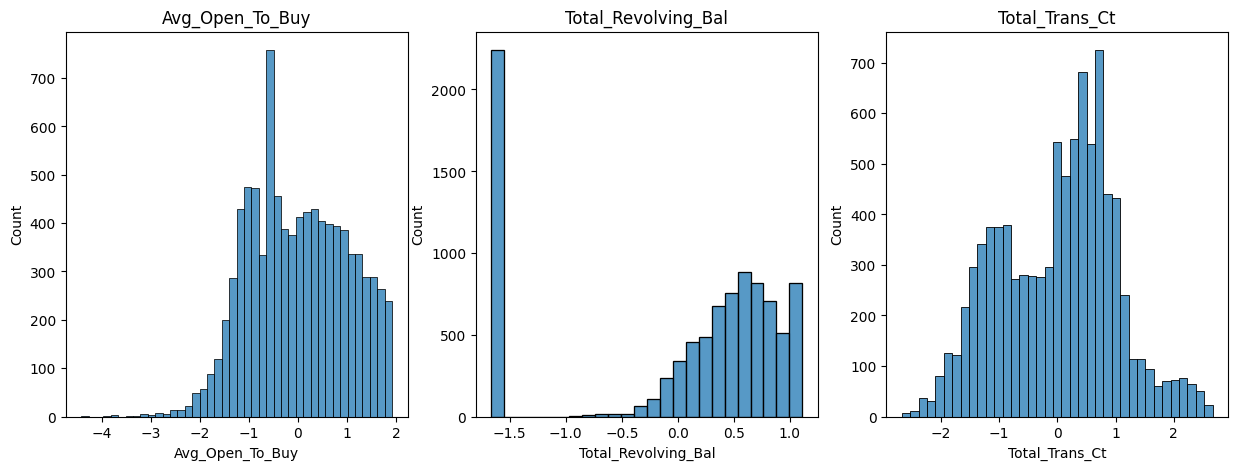

In [141]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(data_bc, x='Avg_Open_To_Buy', ax=axes[0])
sns.histplot(data_bc, x='Total_Revolving_Bal', ax=axes[1])
sns.histplot(data_bc, x='Total_Trans_Ct', ax=axes[2])


axes[0].set_title('Avg_Open_To_Buy')
axes[1].set_title('Total_Revolving_Bal')
axes[2].set_title('Total_Trans_Ct')

# Display the plots
plt.show()


In [142]:
data_bc.describe()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
count,9.161000e+03,9.161000e+03,9.161000e+03,9.161000e+03
mean,3.102468e-16,-4.467554e-16,4.653702e-16,1.985580e-16
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-1.663900e+00,-4.421609e+00,-2.486851e+00,-2.666404e+00
25%,-4.903432e-01,-7.848888e-01,-6.549862e-01,-8.229600e-01
50%,4.033451e-01,-3.308261e-02,-4.103785e-02,1.526372e-01
75%,7.277156e-01,8.108905e-01,6.974828e-01,6.950995e-01
max,1.112643e+00,1.918758e+00,2.674923e+00,2.665348e+00


In [143]:
from sklearn.cluster import KMeans

In [144]:
inercia = []
ks = []

for k in range(1,25):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_bc)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\JEYxc\anaconda3\envs\Python11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\JEYxc\anaconda3\envs\Python11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\JEYxc\anaconda3\envs\Python11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\JEYxc\anaconda3\envs\Python11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\JEYxc\anaconda3\envs\Python11\Lib\site-packages\skl

In [145]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)


<Axes: xlabel='k', ylabel='inercia'>

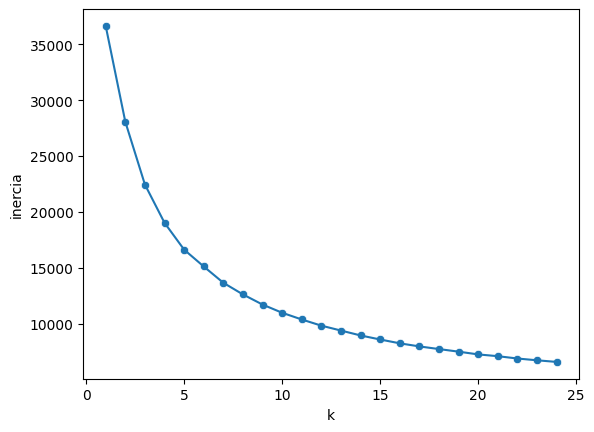

In [146]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [147]:
modelo = KMeans(n_clusters=4,random_state = 10)
modelo.fit(data_bc)

c:\Users\JEYxc\anaconda3\envs\Python11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=10)

In [148]:
data_no_outliers['cluster'] = modelo.labels_
data_no_outliers

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct,cluster
0,777,11914.0,45,42,0
1,864,7392.0,49,33,0
2,0,3418.0,51,20,3
3,2517,796.0,40,20,0
4,0,4716.0,40,28,3
...,...,...,...,...,...
10122,1851,2152.0,50,117,2
10123,2186,2091.0,41,69,1
10124,0,5409.0,44,60,3
10125,0,5281.0,30,62,3


In [149]:
data_no_outliers.groupby(by='cluster').count()

,Total_Revolving_Bal,Avg_Open_To_Buy,Customer_Age,Total_Trans_Ct
cluster,,,,
0,1803,1803,1803,1803
1,2804,2804,2804,2804
2,2301,2301,2301,2301
3,2253,2253,2253,2253


<Axes: >

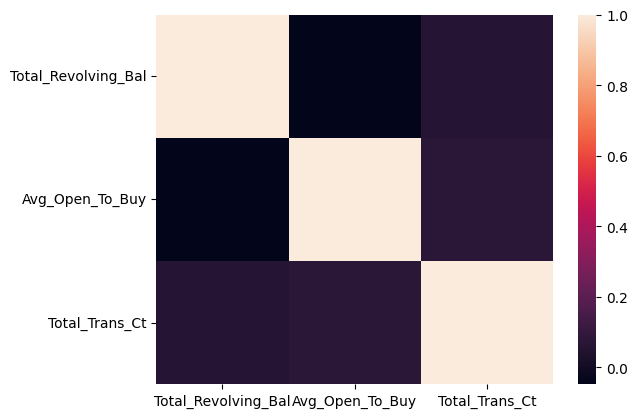

In [150]:
sns.heatmap(data_clean[['Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Trans_Ct']].corr(),)

In [64]:
data_no_outliers.groupby(by='cluster').agg(['min','mean','max'])

Total_Revolving_Bal                    Avg_Open_To_Buy               \
                        min         mean   max             min         mean   
cluster                                                                       
0                         0  1547.909040  2517           156.0  5694.066667   
1                       412  1579.008916  2517             3.0   999.786840   
2                         0  1488.385485  2517          1527.0  8842.037810   
3                         0     3.172659   468          1268.3  5682.435242   

                 Customer_Age                Total_Trans_Ct                  
             max          min       mean max            min       mean  max  
cluster                                                                      
0        22616.0           30  51.466999  68             10  39.122573   83  
1         3865.0           26  44.501070  65             17  69.596648  127  
2        22611.0           26  44.793133  65             33  81.146023  131  
3        22599.0           26  46.020417  65             10  61.011984  131

<Axes: xlabel='Total_Revolving_Bal', ylabel='Avg_Open_To_Buy'>

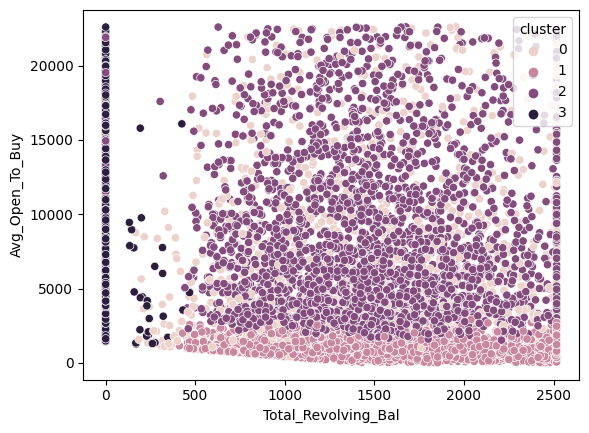

In [65]:
sns.scatterplot(data=data_no_outliers, x='Total_Revolving_Bal', y='Avg_Open_To_Buy', hue='cluster')
# podemos ver la distribución de los clusters
#'Total_Revolving_Bal','Avg_Open_To_Buy', 'Customer_Age','Total_Trans_Ct'

In [ ]:
data_no_outliers.describe()

,Total_Revolving_Bal,Dependent_count,Customer_Age,Total_Trans_Ct,cluster
count,10123.000000,10123.000000,10123.000000,10123.000000,10123.000000
mean,1162.703052,2.346735,46.320557,64.852119,1.398992
std,815.013741,1.298661,8.009804,23.447132,1.059552
min,0.000000,0.000000,26.000000,10.000000,0.000000
25%,357.000000,1.000000,41.000000,45.000000,1.000000
50%,1276.000000,2.000000,46.000000,67.000000,1.000000
75%,1784.000000,3.000000,52.000000,81.000000,2.000000
max,2517.000000,5.000000,68.000000,134.000000,3.000000


In [151]:
import plotly.express as px

In [152]:
fig = px.scatter_3d(data_no_outliers, x = 'Total_Trans_Ct',
y = 'Total_Revolving_Bal',
z = 'Avg_Open_To_Buy',
color = 'cluster')

fig.show()